<p align="center"><img width="50%" src="https://aimodelsharecontent.s3.amazonaws.com/aimodshare_banner.jpg" /></p>

# Climate Change Satellite Image Classification Competition Model Submission Guide - keras

---
**About the Original Data:**<br>
*Data and Description accessed from [Tensorflow](https://www.tensorflow.org/datasets/catalog/bigearthnet)* <br>
The BigEarthNet is a new large-scale Sentinel-2 benchmark archive, consisting of 590,326 Sentinel-2 image patches. The image patch size on the ground is 1.2 x 1.2 km with variable image size depending on the channel resolution. This is a multi-label dataset with 43 imbalanced labels, which has been simplified to single labels with 3 categories for the purposes of this competition.

To construct the BigEarthNet, 125 Sentinel-2 tiles acquired between June 2017 and May 2018 over the 10 countries (Austria, Belgium, Finland, Ireland, Kosovo, Lithuania, Luxembourg, Portugal, Serbia, Switzerland) of Europe were initially selected. All the tiles were atmospherically corrected by the Sentinel-2 Level 2A product generation and formatting tool (sen2cor). Then, they were divided into 590,326 non-overlapping image patches. Each image patch was annotated by the multiple land-cover classes (i.e., multi-labels) that were provided from the CORINE Land Cover database of the year 2018 (CLC 2018).

Bands and pixel resolution in meters:

    B01: Coastal aerosol; 60m
    B02: Blue; 10m
    B03: Green; 10m
    B04: Red; 10m
    B05: Vegetation red edge; 20m
    B06: Vegetation red edge; 20m
    B07: Vegetation red edge; 20m
    B08: NIR; 10m
    B09: Water vapor; 60m
    B11: SWIR; 20m
    B12: SWIR; 20m
    B8A: Narrow NIR; 20m

License: Community Data License Agreement - Permissive, Version 1.0."

**Competition Data Specifics:**<br>
For the purpose of this competition, the original BigEarthNet dataset has been simplified to 20,000 images (15,000 training images and 5,000 test images) with 3 categories: "forest", "nonforest", and "snow_shadow_cloud", which contains images of snow and clouds. <br>
Each "image" is a folder with 12 satellite image layers, each of which pics up on different features. The example preprocessor uses just three layers: B02, B03, and B04, which contain the standard RGB layers used in ML models. However, you are free to use any combination of the satellite image layers. 

**Data Source:**<br>
Sumbul, G, Charfuelan, M, Demir, B and Markl, V. (2019). BigEarthNet: A Large-Scale Benchmark Archive For Remote Sensing Image Understanding. *Computing Research Repository (CoRR), abs/1902.06148.* https://www.tensorflow.org/datasets/catalog/bigearthnet




# Overview
---

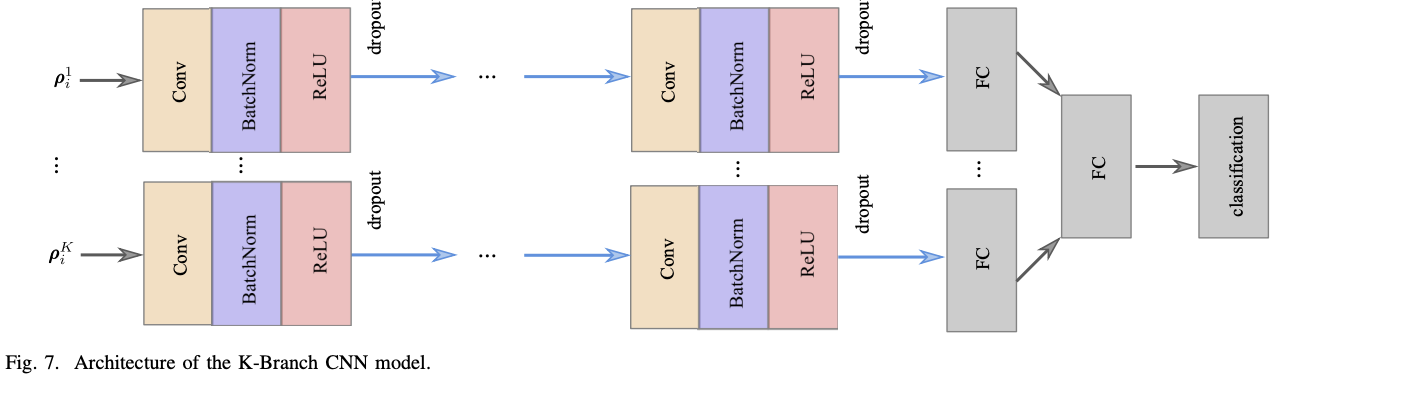


The K-Branch CNN is proposed to efficiently model the spatial and spectral content of RS images with a branchwise CNN architecture when the image bands are associated to different spatial resolutions (e.g., Sentinel-2 images).


Excluding Bands01 and Bands09 - This is due to the fact these bands are mainly used for cloud screening, atmospheric correction and cirrus detection in RS applications and do not embody a significant amount of information for the characterization of semantic content of RS images 

## 1. Load Data

In [1]:
!python -V

Python 3.8.0


In [2]:
#install aimodelshare library
# ! pip install aimodelshare-nightly

In [3]:
# Get competition data - May take a couple minutes due to size of data set
# from aimodelshare import download_data
# download_data('public.ecr.aws/y2e2a1d6/climate_competition_data-repository:latest') 

In [4]:
# # Unzip Data - May take a couple minutes due to size of data set
# import zipfile
# with zipfile.ZipFile('climate_competition_data/climate_competition_data.zip', 'r') as zip_ref:
#     zip_ref.extractall('competition_data')

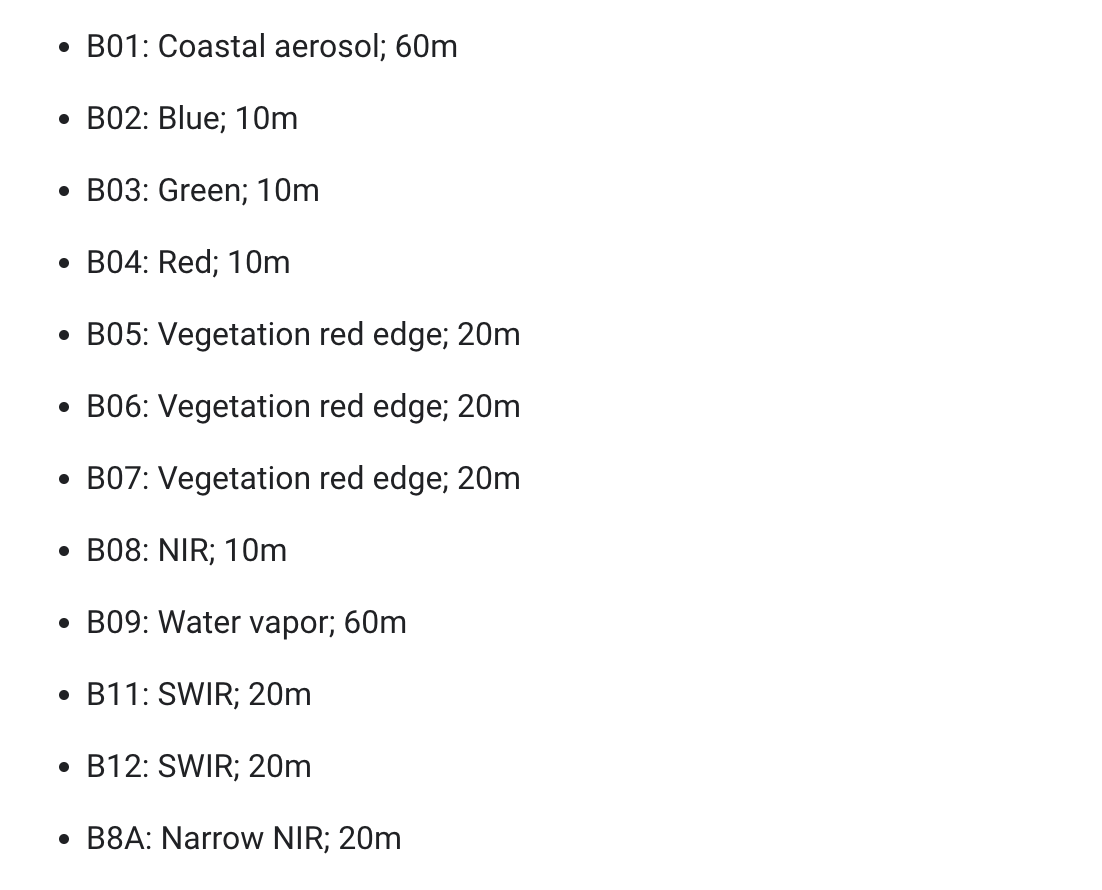

##2.   Preprocess data / Write and Save Preprocessor function


In [5]:
# Set up for data preprocessing
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [6]:
# Here is a pre-designed preprocessor, but you could also build your own to prepare the data differently

def preprocessor(imageband_directory):
    """
    This function preprocesses reads in images, resizes them to a fixed shape and
    min/max transforms them before converting feature values to float32 numeric values
    required by onnx files.

    params:
        imageband_directory
            path to folder with 13 satellite image bands

    returns:
        X
            numpy array of preprocessed image data

    """

    import PIL
    import os
    import numpy as np
    import tensorflow_datasets as tfds

    def _load_tif(data):
        """Loads TIF file and returns as float32 numpy array."""
        img = tfds.core.lazy_imports.PIL_Image.open(data)
        img = np.array(img.getdata()).reshape(img.size).astype(np.float32)
        return img

    def preprocess_image(imgarray): 
        return imgarray # First KNN Model , No Per Image Processing
    
    image_10M_resolution_list = [0]*4
    image_20M_resolution_list = [0]*6

    
    # 10m spatial resolution (bands 2, 3, 4, and 8 ) are fed into the first branch 
    # 20m spatial resolution (5, 6, 7, 8A, 11 and 12) are fed into the second branch.

    filelist1 = os.listdir(imageband_directory)

    for fpath in filelist1:
        fullpath = imageband_directory+"/"+fpath

        # 10m spatial resolution (bands 2, 3, 4, and 8 ) are fed into the first branch 
        #  B02 - Channel 0  
        #  B03 - Channel 1  
        #  B04 - Channel 2  
        #  B08 - Channel 3  
        if fullpath.endswith('B02.tif'): 
            imgarray = _load_tif(imageband_directory+"/"+fpath)
            image_10M_resolution_list[0] = preprocess_image(imgarray)               

        if fullpath.endswith('B03.tif'): 
            imgarray = _load_tif(imageband_directory+"/"+fpath)
            image_10M_resolution_list[1] = preprocess_image(imgarray)               
        
        if fullpath.endswith('B04.tif'): 
            imgarray = _load_tif(imageband_directory+"/"+fpath)
            image_10M_resolution_list[2] = preprocess_image(imgarray)  
            
        if fullpath.endswith('B08.tif'): 
            imgarray = _load_tif(imageband_directory+"/"+fpath)
            image_10M_resolution_list[3] = preprocess_image(imgarray)  

        # 20m spatial resolution (5, 6, 7, 8A, 11 and 12) are fed into the second branch.
        #  B05 - Channel 0  
        #  B06 - Channel 1  
        #  B07 - Channel 2  
        #  B8A - Channel 3 
        #  B11 - Channel 4
        #  B12 - Channel 5
        
        if fullpath.endswith('B05.tif'): 
            imgarray = _load_tif(imageband_directory+"/"+fpath)
            image_20M_resolution_list[0] = preprocess_image(imgarray)               

        if fullpath.endswith('B06.tif'): 
            imgarray = _load_tif(imageband_directory+"/"+fpath)
            image_20M_resolution_list[1] = preprocess_image(imgarray)               
        
        if fullpath.endswith('B07.tif'): 
            imgarray = _load_tif(imageband_directory+"/"+fpath)
            image_20M_resolution_list[2] = preprocess_image(imgarray)  
            
        if fullpath.endswith('B8A.tif'): 
            imgarray = _load_tif(imageband_directory+"/"+fpath)
            image_20M_resolution_list[3] = preprocess_image(imgarray)  
            
        if fullpath.endswith('B11.tif'): 
            imgarray = _load_tif(imageband_directory+"/"+fpath)
            image_20M_resolution_list[4] = preprocess_image(imgarray)  
    
        if fullpath.endswith('B12.tif'): 
            imgarray = _load_tif(imageband_directory+"/"+fpath)
            image_20M_resolution_list[5] = preprocess_image(imgarray)  
        
    _10M_X = np.stack(image_10M_resolution_list, axis=2)   # to get (height,width,3)
    _20M_X = np.stack(image_20M_resolution_list, axis=2)
    
    # Expand dims to add "1" to object shape [1, h, w, channels] for keras model.
    _10M_X = np.expand_dims(_10M_X, axis=0)
    _20M_X = np.expand_dims(_20M_X, axis=0)

    _10M_X = np.array(_10M_X, dtype=np.float32) 
    _20M_X = np.array(_20M_X, dtype=np.float32)
    
    return _10M_X,_20M_X

In [7]:
# # Create complete list of file names
# forestfilenames = ["competition_data/trainingdata/forest/" +
#                    x for x in os.listdir("competition_data/trainingdata/forest")]
# nonforestfilenames = ["competition_data/trainingdata/nonforest/" +
#                       x for x in os.listdir("competition_data/trainingdata/nonforest")]
# otherfilenames = ["competition_data/trainingdata/other/" +
#                   x for x in os.listdir("competition_data/trainingdata/other")]

# filenames = forestfilenames+nonforestfilenames+otherfilenames


# preprocessed_image_data_10M = []
# preprocessed_image_data_20M = [] 


# for i in filenames:
#     try:
#         _10MX,_20MX  = preprocessor(i)
#         preprocessed_image_data_10M.append(_10MX)
#         preprocessed_image_data_20M.append(_20MX)
#     except Exception as e:
#         print(e)
#         pass

In [9]:
model_number = 8

In [10]:
# len(preprocessed_image_data_10M),len(preprocessed_image_data_20M)

In [11]:
# np.save(f"KCNN_{model_number}_10M",preprocessed_image_data_10M)
# np.save(f"KCNN_{model_number}_20M",preprocessed_image_data_20M)

In [26]:
preprocessed_image_data_10M = np.load(f"KCNN_{1}_10M.npy")
preprocessed_image_data_20M = np.load(f"KCNN_{1}_20M.npy")

In [27]:
# Set up y data
from itertools import repeat
forest=repeat("forest",5000)
nonforest=repeat("nonforest",5000)
other=repeat("snow_shadow_cloud",5000)
ylist=list(forest)+list(nonforest)+list(other)

In [28]:
# Shuffle X and y data
from sklearn.utils import shuffle

_10MX_train, _20MX_train , y_train = shuffle( 
                                                preprocessed_image_data_10M,
                                                preprocessed_image_data_20M, 
                                                ylist, 
                                                random_state = 42 )



In [29]:
_10MX_train=np.vstack(_10MX_train)

_20MX_train=np.vstack(_20MX_train)

In [30]:
_10MX_train.shape , _20MX_train.shape

((15000, 120, 120, 4), (15000, 60, 60, 6))

In [31]:
_10MX_MaxValueArray = [] 
_20MX_MaxValueArray = [] 

for i in range(4):
    print(f"Max Value of {i} channel in _10MX is {_10MX_train[:,:,:,i].max()}")


for i in range(6):
    print(f"Max Value of {i} channel in _20MX is {_20MX_train[:,:,:,i].max()}")

Max Value of 0 channel in _10MX is 18581.0
Max Value of 1 channel in _10MX is 17833.0
Max Value of 2 channel in _10MX is 17032.0
Max Value of 3 channel in _10MX is 16314.0
Max Value of 0 channel in _20MX is 16685.0
Max Value of 1 channel in _20MX is 16542.0
Max Value of 2 channel in _20MX is 16395.0
Max Value of 3 channel in _20MX is 16168.0
Max Value of 4 channel in _20MX is 15350.0
Max Value of 5 channel in _20MX is 15240.0


In [32]:
def divide_channelbyMax(X_train,val,max_ValueArray):
    for i in range(val): 
        max_ValueArray.append(X_train[:,:,:,i].max())
        X_train[:,:,:,i] = (X_train[:,:,:,i]*255)/max_ValueArray[-1]
    return X_train,max_ValueArray

In [33]:
_10MX_train,_10MX_MaxValueArray = divide_channelbyMax(_10MX_train,4,_10MX_MaxValueArray)


_20MX_train,_20MX_MaxValueArray = divide_channelbyMax(_20MX_train,6,_20MX_MaxValueArray)


In [34]:
for i in range(4):
    print(f"Max Value of {i} channel in _10MX is {_10MX_train[:,:,:,i].max()}")


for i in range(6):
    print(f"Max Value of {i} channel in _20MX is {_20MX_train[:,:,:,i].max()}")

Max Value of 0 channel in _10MX is 255.0
Max Value of 1 channel in _10MX is 255.0
Max Value of 2 channel in _10MX is 255.0
Max Value of 3 channel in _10MX is 255.0
Max Value of 0 channel in _20MX is 255.0
Max Value of 1 channel in _20MX is 255.0
Max Value of 2 channel in _20MX is 255.0
Max Value of 3 channel in _20MX is 255.0
Max Value of 4 channel in _20MX is 255.0
Max Value of 5 channel in _20MX is 255.0


In [35]:
_10MX_train.shape , _20MX_train.shape

((15000, 120, 120, 4), (15000, 60, 60, 6))

##3. Fit model on preprocessed data and save preprocessor function and model 


In [36]:
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input,Conv2D,Dense,BatchNormalization,Flatten,Activation,ReLU,LSTM,Bidirectional
from tensorflow.keras.layers import concatenate,Dropout,MaxPooling2D,GlobalAveragePooling2D

from tensorflow.keras.optimizers import SGD

from tensorflow.keras.applications.resnet import ResNet50


from tensorflow.keras.utils import plot_model

import pandas 


os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"



In [37]:
#   def branch_model_10m(self, inputs, is_training):
#         with tf.variable_scope('CNN_10m_branch'):
#             out = self.conv_block(inputs, 32, [5,5], is_training, 'conv_block_0')
#             out = self.pooling(out, 'max_pooling')
#             out = self.dropout(out, 0.25, is_training, 'dropout_0')
#             out = self.conv_block(out, 32, [5,5], is_training, 'conv_block_1')
#             out = self.pooling(out, 'max_pooling_1')
#             out = self.dropout(out, 0.25, is_training, 'dropout_1')
#             out = self.conv_block(out, 64, [3,3], is_training, 'conv_block_2')
#             out = self.dropout(out, 0.25, is_training, 'dropout_2')
#             out = tf.contrib.layers.flatten(out)
#             out = self.fully_connected_block(out, self.feature_size, is_training, 'fc_block_0')
#             feature = self.dropout(out, 0.5, is_training, 'dropout_3')
#             return feature 

#     def branch_model_20m(self, inputs, is_training):
#         with tf.variable_scope('CNN_20m_branch'):
#             out = self.conv_block(inputs, 32, [3,3], is_training, 'conv_block_0')
#             out = self.pooling(out, 'max_pooling_0')
#             out = self.dropout(out, 0.25, is_training, 'dropout_0')
#             out = self.conv_block(out, 32, [3,3], is_training, 'conv_block_1')
#             out = self.dropout(out, 0.25, is_training, 'dropout_1')
#             out = self.conv_block(out, 64, [3,3], is_training, 'conv_block_2')
#             out = self.dropout(out, 0.25, is_training, 'dropout_2')
#             out = tf.contrib.layers.flatten(out)
#             out = self.fully_connected_block(out, self.feature_size, is_training, 'fc_block_0')
#             feature = self.dropout(out, 0.5, is_training, 'dropout_3')  
#             return feature


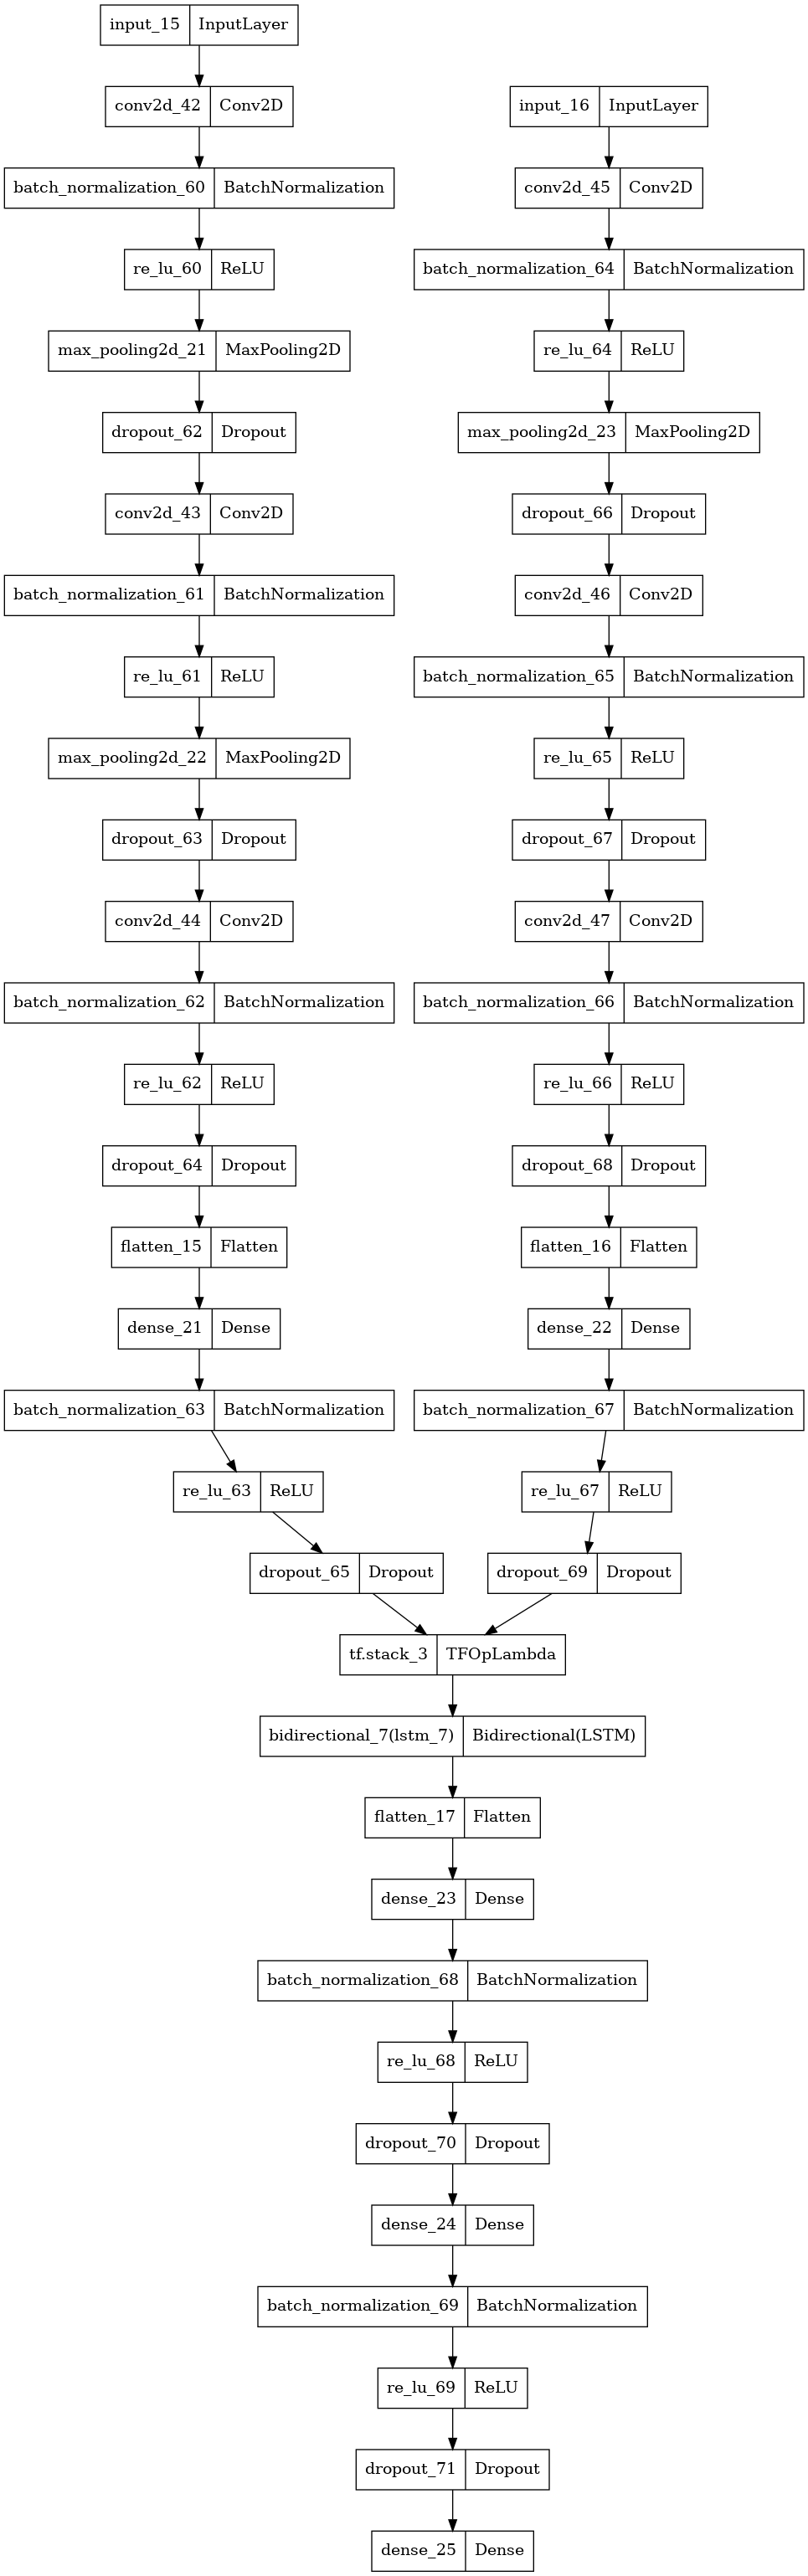

In [48]:
def ConvolutionBlock(inputs,filter_size,nb_filter):
    output = Conv2D(filter_size,nb_filter)(inputs)
    batch_norm = BatchNormalization()(output)
    relu_output = ReLU()(batch_norm)
    return relu_output

def FullyConnectedBlock(inputs,nb_neurons):
    output = Dense(nb_neurons)(inputs)
    batch_norm = BatchNormalization()(output)
    relu_output = ReLU()(batch_norm)
    return relu_output

_10MX_Input = Input(shape=(120, 120, 4))

_10MX = ConvolutionBlock(_10MX_Input, 32, (5,5))
_10MX = MaxPooling2D(pool_size=(2,2) ,strides = (2,2),padding="VALID")(_10MX)
_10MX = Dropout(0.25)(_10MX)
_10MX = ConvolutionBlock(_10MX, 32, (5,5))
_10MX = MaxPooling2D(pool_size=(2,2) ,strides = (2,2),padding="VALID")(_10MX)
_10MX = Dropout(0.25)(_10MX)
_10MX = ConvolutionBlock(_10MX, 64, (3,3))
_10MX = Dropout(0.25)(_10MX)
_10MX = Flatten()(_10MX)
_10MX = FullyConnectedBlock(_10MX,2048)
_10MX = Dropout(0.25)(_10MX)


_20MX_Input = Input(shape=(60, 60, 6))

_20MX = ConvolutionBlock(_20MX_Input, 32, (3,3))
_20MX = MaxPooling2D(pool_size=(2,2) ,strides = (2,2),padding="VALID")(_20MX)
_20MX = Dropout(0.25)(_20MX)
_20MX = ConvolutionBlock(_20MX, 32, (3,3))
_20MX = Dropout(0.25)(_20MX)
_20MX = ConvolutionBlock(_20MX, 64, (3,3))
_20MX = Dropout(0.25)(_20MX)
_20MX = Flatten()(_20MX)
_20MX = FullyConnectedBlock(_20MX,2048)
_20MX = Dropout(0.25)(_20MX)


Concat_layer = tf.stack([_10MX,_20MX],axis=1)



X = Bidirectional(LSTM(10, activation='relu', return_sequences=True))(Concat_layer)

X = Flatten()(X)
X = FullyConnectedBlock(X,64)
X = Dropout(0.25)(X)
X = FullyConnectedBlock(X,32)
X = Dropout(0.25)(X)
# X = FullyConnectedBlock(X,1024)
# X = Dropout(0.25)(X)
# X = FullyConnectedBlock(X,512)
# X = Dropout(0.25)(X)
# X = FullyConnectedBlock(X,256)
# X = Dropout(0.25)(X)
X = Dense(3, activation='softmax')(X)

model = Model(inputs=[_10MX_Input,_20MX_Input], outputs= X)
plot_model(model)
# model.summary()

In [49]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 120, 120, 4  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_42 (Conv2D)             (None, 116, 116, 32  3232        ['input_15[0][0]']               
                                )                                                                 
                                                                                                  
 input_16 (InputLayer)          [(None, 60, 60, 6)]  0           []                               
                                                                                            

                                                                                                  
 batch_normalization_67 (BatchN  (None, 2048)        8192        ['dense_22[0][0]']               
 ormalization)                                                                                    
                                                                                                  
 re_lu_63 (ReLU)                (None, 2048)         0           ['batch_normalization_63[0][0]'] 
                                                                                                  
 re_lu_67 (ReLU)                (None, 2048)         0           ['batch_normalization_67[0][0]'] 
                                                                                                  
 dropout_65 (Dropout)           (None, 2048)         0           ['re_lu_63[0][0]']               
                                                                                                  
 dropout_6

In [50]:
model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(5e-4),
                      metrics=['accuracy'])

def scheduler(epoch, lr):
    if epoch < 5 :
        return lr
    else:
        return lr * tf.math.exp(-0.5)
    
Model_Checkpoint = tf.keras.callbacks.ModelCheckpoint(f"KCNN_Model{model_number}",save_best_only=True)
    
    
Learningrate_Scheduler  = tf.keras.callbacks.LearningRateScheduler(scheduler)
    
with tf.device('/device:GPU:0'): # "/GPU:0": Short-hand notation for the first GPU of your machine that is visible to TensorFlow.
    model.fit(  [_10MX_train , _20MX_train], 
                pandas.get_dummies(y_train),
                validation_split = .3, 
                epochs = 20,
                callbacks=[Model_Checkpoint,Learningrate_Scheduler])
    

    model.save(f"KCNN_Model{8}.h5")


Epoch 1/20
329/329 [==============================] - ETA: 0s - loss: 0.5986 - accuracy: 0.7502

INFO:tensorflow:Assets written to: KCNN_Model8/assets


INFO:tensorflow:Assets written to: KCNN_Model8/assets


329/329 [==============================] - 86s 227ms/step - loss: 0.5986 - accuracy: 0.7502 - val_loss: 1.4495 - val_accuracy: 0.5500 - lr: 5.0000e-04
Epoch 2/20
329/329 [==============================] - ETA: 0s - loss: 0.4546 - accuracy: 0.8121

INFO:tensorflow:Assets written to: KCNN_Model8/assets


INFO:tensorflow:Assets written to: KCNN_Model8/assets


329/329 [==============================] - 83s 254ms/step - loss: 0.4546 - accuracy: 0.8121 - val_loss: 0.5313 - val_accuracy: 0.7740 - lr: 5.0000e-04
Epoch 3/20
329/329 [==============================] - 57s 172ms/step - loss: 0.4078 - accuracy: 0.8294 - val_loss: 0.6241 - val_accuracy: 0.7564 - lr: 5.0000e-04
Epoch 4/20
329/329 [==============================] - ETA: 0s - loss: 0.3887 - accuracy: 0.8456

INFO:tensorflow:Assets written to: KCNN_Model8/assets


INFO:tensorflow:Assets written to: KCNN_Model8/assets


329/329 [==============================] - 83s 254ms/step - loss: 0.3887 - accuracy: 0.8456 - val_loss: 0.4067 - val_accuracy: 0.8244 - lr: 5.0000e-04
Epoch 5/20
329/329 [==============================] - 57s 172ms/step - loss: 0.3564 - accuracy: 0.8523 - val_loss: 0.6020 - val_accuracy: 0.7682 - lr: 5.0000e-04
Epoch 6/20
329/329 [==============================] - ETA: 0s - loss: 0.3186 - accuracy: 0.8749

INFO:tensorflow:Assets written to: KCNN_Model8/assets


INFO:tensorflow:Assets written to: KCNN_Model8/assets


329/329 [==============================] - 83s 253ms/step - loss: 0.3186 - accuracy: 0.8749 - val_loss: 0.3666 - val_accuracy: 0.8478 - lr: 3.0327e-04
Epoch 7/20
329/329 [==============================] - 57s 172ms/step - loss: 0.2726 - accuracy: 0.8936 - val_loss: 0.4134 - val_accuracy: 0.8329 - lr: 1.8394e-04
Epoch 8/20
329/329 [==============================] - ETA: 0s - loss: 0.2420 - accuracy: 0.9058

INFO:tensorflow:Assets written to: KCNN_Model8/assets


INFO:tensorflow:Assets written to: KCNN_Model8/assets


329/329 [==============================] - 83s 253ms/step - loss: 0.2420 - accuracy: 0.9058 - val_loss: 0.3592 - val_accuracy: 0.8444 - lr: 1.1157e-04
Epoch 9/20
329/329 [==============================] - 57s 172ms/step - loss: 0.2149 - accuracy: 0.9174 - val_loss: 0.4037 - val_accuracy: 0.8296 - lr: 6.7668e-05
Epoch 10/20
329/329 [==============================] - ETA: 0s - loss: 0.1988 - accuracy: 0.9255

INFO:tensorflow:Assets written to: KCNN_Model8/assets


INFO:tensorflow:Assets written to: KCNN_Model8/assets


329/329 [==============================] - 83s 253ms/step - loss: 0.1988 - accuracy: 0.9255 - val_loss: 0.3521 - val_accuracy: 0.8527 - lr: 4.1043e-05
Epoch 11/20
329/329 [==============================] - 57s 172ms/step - loss: 0.1881 - accuracy: 0.9318 - val_loss: 0.4196 - val_accuracy: 0.8289 - lr: 2.4894e-05
Epoch 12/20
329/329 [==============================] - 57s 172ms/step - loss: 0.1780 - accuracy: 0.9344 - val_loss: 0.3740 - val_accuracy: 0.8456 - lr: 1.5099e-05
Epoch 13/20
329/329 [==============================] - 57s 172ms/step - loss: 0.1785 - accuracy: 0.9361 - val_loss: 0.3706 - val_accuracy: 0.8456 - lr: 9.1578e-06
Epoch 14/20
329/329 [==============================] - 57s 172ms/step - loss: 0.1724 - accuracy: 0.9411 - val_loss: 0.3585 - val_accuracy: 0.8504 - lr: 5.5545e-06
Epoch 15/20
329/329 [==============================] - 57s 172ms/step - loss: 0.1681 - accuracy: 0.9397 - val_loss: 0.3740 - val_accuracy: 0.8464 - lr: 3.3690e-06
Epoch 16/20
329/329 [=============

In [51]:
dummies_outout = pandas.get_dummies(y_train)

In [52]:
dummies_outout

,forest,nonforest,snow_shadow_cloud
0,0,0,1
1,0,1,0
2,0,0,1
3,1,0,0
4,0,1,0
...,...,...,...
14995,0,1,0
14996,0,0,1
14997,0,1,0
14998,1,0,0


###  Test Image Preprocessing 

In [53]:
# filenumbers = [str(x) for x in range(1, 5001)]

# filenames = ["competition_data/testdata/test/test"+x for x in filenumbers]


# preprocessed_image_data_10M = []
# preprocessed_image_data_20M = [] 


# for i in filenames:
#     try:
#         _10MX,_20MX  = preprocessor(i)
#         preprocessed_image_data_10M.append(_10MX)
#         preprocessed_image_data_20M.append(_20MX)
#     except Exception as e:
#         print(e)
#         pass

In [54]:
# np.save(f"KCNN_test{model_number}_10M",preprocessed_image_data_10M)
# np.save(f"KCNN_test{model_number}_20M",preprocessed_image_data_20M)

preprocessed_image_data_10M = np.load(f"KCNN_test{1}_10M.npy")
preprocessed_image_data_20M = np.load(f"KCNN_test{1}_20M.npy")

In [55]:
_10MX_test=np.vstack(preprocessed_image_data_10M)

_20MX_test=np.vstack(preprocessed_image_data_20M)

In [56]:
_10MX_test.shape , _20MX_test.shape

((5000, 120, 120, 4), (5000, 60, 60, 6))

In [57]:
for i in range(4):
    print(f"Max Value of {i} channel in _10MX is {_10MX_test[:,:,:,i].max()}")

for i in range(6):
    print(f"Max Value of {i} channel in _20MX is {_20MX_test[:,:,:,i].max()}")

Max Value of 0 channel in _10MX is 20565.0
Max Value of 1 channel in _10MX is 18913.0
Max Value of 2 channel in _10MX is 17842.0
Max Value of 3 channel in _10MX is 16586.0
Max Value of 0 channel in _20MX is 17374.0
Max Value of 1 channel in _20MX is 16929.0
Max Value of 2 channel in _20MX is 16693.0
Max Value of 3 channel in _20MX is 16391.0
Max Value of 4 channel in _20MX is 15429.0
Max Value of 5 channel in _20MX is 15261.0


In [58]:
def divide_TestchannelbyMax(X_train,val,max_ValueArray):
    for i in range(val): 
        X_train[:,:,:,i] = (X_train[:,:,:,i]*255)/max_ValueArray[i]
    return X_train

In [59]:
_10MX_test,_ = divide_channelbyMax(_10MX_test,4,[])


_20MX_test,_ = divide_channelbyMax(_20MX_test,6,[])

In [60]:
for i in range(4):
    print(f"Max Value of {i} channel in _10MX is {_10MX_test[:,:,:,i].max()}")


for i in range(6):
    print(f"Max Value of {i} channel in _20MX is {_20MX_test[:,:,:,i].max()}")

Max Value of 0 channel in _10MX is 255.0
Max Value of 1 channel in _10MX is 255.0
Max Value of 2 channel in _10MX is 255.0
Max Value of 3 channel in _10MX is 255.0
Max Value of 0 channel in _20MX is 255.0
Max Value of 1 channel in _20MX is 255.0
Max Value of 2 channel in _20MX is 255.0
Max Value of 3 channel in _20MX is 255.0
Max Value of 4 channel in _20MX is 255.0
Max Value of 5 channel in _20MX is 255.0


In [61]:
_10MX_test.shape , _20MX_test.shape

((5000, 120, 120, 4), (5000, 60, 60, 6))

In [84]:
prediction_column_index=model.predict([_10MX_test,_20MX_test]).argmax(axis=1)


157/157 [==============================] - 6s 35ms/step


In [85]:
prediction_column_index

array([0, 0, 1, ..., 0, 1, 0])

In [86]:
dicti = {0:"snow_shadow_cloud",1:"nonforest",2:"forest"}

In [89]:
prediction_labels = [dummies_outout.columns[i] for i in prediction_column_index]



In [90]:
prediction_labels

['forest',
 'forest',
 'nonforest',
 'forest',
 'forest',
 'forest',
 'nonforest',
 'forest',
 'forest',
 'snow_shadow_cloud',
 'nonforest',
 'nonforest',
 'snow_shadow_cloud',
 'forest',
 'nonforest',
 'forest',
 'forest',
 'snow_shadow_cloud',
 'snow_shadow_cloud',
 'forest',
 'forest',
 'forest',
 'nonforest',
 'forest',
 'nonforest',
 'snow_shadow_cloud',
 'nonforest',
 'nonforest',
 'forest',
 'nonforest',
 'forest',
 'forest',
 'forest',
 'nonforest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'nonforest',
 'forest',
 'forest',
 'snow_shadow_cloud',
 'forest',
 'nonforest',
 'nonforest',
 'forest',
 'forest',
 'forest',
 'nonforest',
 'snow_shadow_cloud',
 'snow_shadow_cloud',
 'nonforest',
 'forest',
 'nonforest',
 'nonforest',
 'nonforest',
 'forest',
 'forest',
 'forest',
 'nonforest',
 'forest',
 'forest',
 'forest',
 'nonforest',
 'forest',
 'nonforest',
 'forest',
 'nonforest',
 'snow_shadow_cloud',
 'nonforest',
 'forest',
 'nonforest',
 'forest',
 

In [69]:
model_number

8

In [91]:
np.save(f"KCNN_test{model_number}_Prediction_labels",prediction_labels)

In [92]:
old = np.load(f"KCNN_test{1}_Prediction_labels.npy")

In [93]:
(old == prediction_labels).sum()/len(prediction_labels)

0.9082

#### Save preprocessor function to local "preprocessor.zip" file

In [73]:
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"") 

cannot pickle 'module' object
Your preprocessor is now saved to 'preprocessor.zip'


In [75]:
model = tf.keras.models.load_model("KCNN_Model8")  

#### Save model to local ".onnx" file

In [76]:
# Save keras model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

onnx_model = model_to_onnx(model, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

# with open("model.onnx", "wb") as f:
#     f.write(onnx_model.SerializeToString())

/home/ecbm4040/climate_change/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/usr/lib/python3.8/runpy.py:125: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2022-03-26 20:33:20,921 - WARNING - '--tag' not specified for saved_model. Using --tag serve
2022-03-26 20:33:24,366 - INFO - Signatures found in model: [serving_default].
2022-03-26 20:33:24,366 - WARNING - '--signature_def' not specified, using first signature: serving_default
2022-03-26 20:33:24,367 - INFO - Output names: ['dense_25']
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
2022-03-26 20:33:43,317 - WARNING - From /home/ecbm4040/climate_chang

Message onnx.ModelProto exceeds maximum protobuf size of 2GB: 4364050482


In [10]:
# with open("model.onnx", "wb") as f:
#     f.write(onnx_model.SerializeToString())

In [78]:
#Set credentials using modelshare.org username/password

from aimodelshare.aws import set_credentials

# Note -- This is the unique rest api that powers this climate change image classification  Model Plaground
# ... Update the apiurl if submitting to a new competition

apiurl="https://srdmat3yhf.execute-api.us-east-1.amazonaws.com/prod/m"
set_credentials(apiurl=apiurl)

AI Modelshare Username:········
AI Modelshare Password:········
AI Model Share login credentials set successfully.


In [79]:
#Instantiate Competition

mycompetition= ai.Competition(apiurl)

In [94]:
# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model_filepath = None,
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

 17% [............                                                            ]  2449408 / 14163623

 97% [......................................................................  ] 13787136 / 14163623

100% [........................................................................] 14163623 / 14163623

/home/ecbm4040/climate_change/lib/python3.8/site-packages/aimodelshare/model.py:287: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  leaderboard = leaderboard.append(metadata, ignore_index=True, sort=False)
/home/ecbm4040/climate_change/lib/python3.8/site-packages/aimodelshare/model.py:289: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  leaderboard['username']=leaderboard.pop("username")
/home/ecbm4040/climate_change/lib/python3.8/site-packages/aimodelshare/model.py:290: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=

100% [............................................................................] 775866 / 775866

/home/ecbm4040/climate_change/lib/python3.8/site-packages/aimodelshare/model.py:287: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  leaderboard = leaderboard.append(metadata, ignore_index=True, sort=False)
/home/ecbm4040/climate_change/lib/python3.8/site-packages/aimodelshare/model.py:289: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  leaderboard['username']=leaderboard.pop("username")
/home/ecbm4040/climate_change/lib/python3.8/site-packages/aimodelshare/model.py:290: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 204

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:1535


In [95]:
# Get leaderboard to explore current best model architectures

# Get raw data in pandas data frame
data = mycompetition.get_leaderboard()

# Stylize leaderboard data
mycompetition.stylize_leaderboard(data)

In [96]:
data[data["username"] == "vkalmath"]

,accuracy,f1_score,precision,recall,ml_framework,transfer_learning,deep_learning,model_type,depth,num_params,...,memory_size,Member1,Member2,team,Deep Learning,Optimizer,Transfer Learning,username,timestamp,version
5,0.7648,0.776539,0.791213,0.827111,keras,NaN,True,Sequential,8.0,136387.0,...,4813664.0,NaN,NaN,NaN,NaN,NaN,NaN,vkalmath,2022-03-19 19:11:33.485952,88
10,0.7600,0.750484,0.798412,0.787111,keras,NaN,True,Functional,6.0,4721667.0,...,36292024.0,NaN,NaN,NaN,NaN,NaN,NaN,vkalmath,2022-03-25 03:05:21.678937,170
30,0.7276,0.725968,0.722002,0.785111,keras,NaN,True,Sequential,7.0,136387.0,...,4803824.0,NaN,NaN,NaN,NaN,NaN,NaN,vkalmath,2022-03-18 19:48:55.382639,73
38,0.7020,0.691703,0.786387,0.733556,keras,NaN,True,Functional,45.0,5160643.0,...,12364176.0,NaN,NaN,NaN,NaN,NaN,NaN,vkalmath,2022-03-26 07:15:02.857409,194
40,0.6972,0.709685,0.722674,0.756667,keras,NaN,True,Sequential,7.0,20057603.0,...,27253624.0,NaN,NaN,NaN,NaN,NaN,NaN,vkalmath,2022-03-24 03:19:52.050337,153
44,0.6964,0.698332,0.749256,0.724222,keras,NaN,True,Sequential,8.0,9573891.0,...,14168312.0,NaN,NaN,NaN,NaN,NaN,NaN,vkalmath,2022-03-24 01:39:59.262445,152
48,0.6780,0.678438,0.781394,0.725556,unknown,NaN,NaN,unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,vkalmath,2022-03-26 19:52:00.627399,199
49,0.6780,0.678438,0.781394,0.725556,unknown,NaN,NaN,unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,vkalmath,2022-03-26 20:38:56.519256,203
53,0.6676,0.677101,0.775917,0.726889,keras,NaN,True,Functional,42.0,8067971.0,...,6403824.0,NaN,NaN,NaN,NaN,NaN,NaN,vkalmath,2022-03-26 06:26:15.381972,191
83,0.6792,0.669706,0.672293,0.696000,keras,NaN,True,Sequential,8.0,9573891.0,...,14116664.0,NaN,NaN,NaN,NaN,NaN,NaN,vkalmath,2022-03-21 19:46:29.959795,120


## 5. Repeat submission process to improve place on leaderboard

*Train and submit your own models using code modeled after what you see above.*

It may also be useful to examine the architeture of models that perform particuarly well/poorly, or to compare models you've created with similar models submitted by others. Use the compare_models function in combination with the leaderboard to learn more about models that been previously submitted and potentially make decisiona about what you should do next.

In [ ]:
# Compare two or more models
data=mycompetition.compare_models([1, 5], verbose=1)
mycompetition.stylize_compare(data)